In [1]:
from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

┌───┐          ┌───┐┌─┐           
q_0: ┤ H ├───────■──┤ H ├┤M├──────■────
     ├───┤     ┌─┴─┐└┬─┬┘└╥┘      │    
q_1: ┤ H ├──■──┤ X ├─┤M├──╫───■───┼────
     └───┘┌─┴─┐└───┘ └╥┘  ║ ┌─┴─┐ │ ┌─┐
q_2: ─────┤ X ├───────╫───╫─┤ X ├─■─┤M├
          └───┘       ║   ║ └───┘   └╥┘
c: 3/═════════════════╩═══╩══════════╩═
                      1   0          2

Measurement output for qubit 3:
{'0': 44, '1': 56}


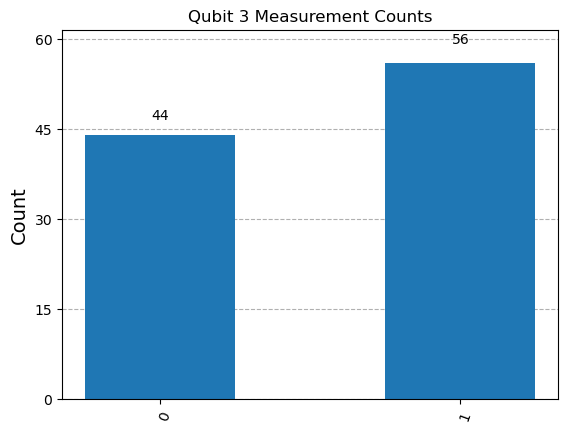

In [3]:
def quantum_teleportation(qubit_to_send_op='H', num_copies=100):
    qc = QuantumCircuit(3, 3)
    """
    Q1 : Alice state qubit to be sent to Bob
    Q2 : Alice control qubit
    Q3 : Bob's control qubit

    Set a state for Q1 based on qubit_to_send_op :
    Implemented operators H, X, Y, Z, I
    """
    if qubit_to_send_op == 'H':
        qc.h(0)
    elif qubit_to_send_op == 'X':
        qc.x(0)
    elif qubit_to_send_op == 'Y':
        qc.y(0)
    elif qubit_to_send_op == 'Z':
        qc.z(0)
    elif qubit_to_send_op == 'S':
        qc.s(0)
    elif qubit_to_send_op == 'T':
        qc.t(0)
    else:
        raise NotImplementedError('Gate not implemented')

    # Entangle Alice and Bob's qubit Qubit 2 and 3 
    qc.h(1)
    qc.cx(1, 2)

    # CNOT Alice data Qubit Q1 with control Qubit Q2 
    qc.cx(0, 1)

    # Transform Alice data Qubit 1 Q1
    qc.h(0)
    
    # Measure Alice qubit Q1 and Q2
    qc.measure([0, 1], [0, 1])
    
    # Do a CNOT on Bob's qubit using Q2 as control and Q3 as target
    qc.cx(1,2)

    # Do a conditioned Z operation on Bob's qubit Q3 using Alice control qubit 1 after measurement
    qc.cz(0,2)
    
    # Measure the final state state transmitted to Bob's qubit Q3
    qc.measure(2, 2)

    # Display the circuit
    display(qc.draw('text'))

    # Use Qiskit's AerSimulator
    simulator = AerSimulator()

    # Transpile the circuit for the simulator
    compiled_circuit = transpile(qc, simulator)
    
    # Execute the circuit on the simulator
    job = simulator.run(compiled_circuit, shots=num_copies)
    
    # Grab results from the job
    result = job.result()
    
    # Get the counts (results)
    counts = result.get_counts(compiled_circuit)

    # Print the counts
    print('Measurement output for qubit 3:')
    qubit_3_counts = {'0': 0, '1': 0}
    for outcome, count in counts.items():
        qubit_3_counts[outcome[-1]] += count
    print(qubit_3_counts)
    
    # Display the results
    display(plot_histogram(qubit_3_counts, title="Qubit 3 Measurement Counts"))
    

if __name__ == '__main__':
    quantum_teleportation(qubit_to_send_op='H')